
# Deep Learning Course

 <img src="https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/Natural-Language-Processing.jpg" >


# Deep Learning Excercise 08
## Analyze how travelers expressed their feelings on Twitter


Developed by [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/) - [Jhon Gonzalez](http://linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)

Andes University

version 2.0, July 18 2018

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

Our target is to classify a feeling tweet message feelings into three possible categories:

* Positive
* Neural
* Negative

We will divide the dataset into train and test and we will recognize the testing tweet feelings


In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [0]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [0]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [0]:
tweets[['airline_sentiment', 'text']]

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials t...
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
570300616901320704,positive,"@VirginAmerica yes, nearly every time I fly VX..."
570300248553349120,neutral,@VirginAmerica Really missed a prime opportuni...
570299953286942721,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"


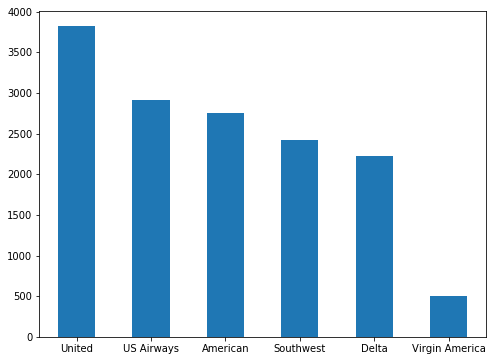

In [0]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

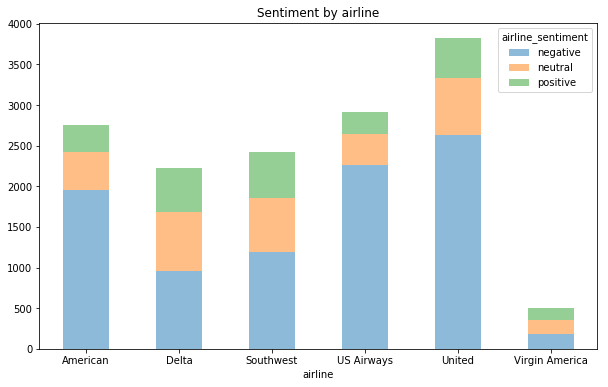

In [0]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [0]:
# ya está partido en X y Y, crear un Random Forest para predecir el sentimiento de los Tweets
# count vectorizer, hacer el flujo como el notebook 19.

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [0]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [0]:
y.describe()

count    14640.000000
mean        -0.465505
std          0.756084
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: airline_sentiment, dtype: float64

In [0]:
from keras.utils import np_utils
y_train= np_utils.to_categorical(y, 3)

Using TensorFlow backend.


We will split our data into train a test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.33, random_state=42)

In [0]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X_train)
X_dtm.shape

(9808, 12056)

In [0]:
print(vect.get_feature_names()[-150:-100])

['xc6jq70r7b', 'xcvqxykg49', 'xd', 'xdjzkc34gb', 'xedeckgmw5', 'xf9mpnaaje', 'xgfs6tjtmo', 'xgpaayfdwt', 'xhsuupheze', 'xijifymvqp', 'xm', 'xmrvr4lgeg', 'xmz3tf9ix8', 'xna', 'xox', 'xoxo', 'xpm98igqjn', 'xrdtov7nl8', 'xtra', 'xx', 'xx2m2jxqep', 'xx5qscjll1', 'xxppzo88j1', 'xxsaombdgs', 'xxy2d2imnp', 'xzbajmiekx', 'xzmscw', 'y3sahvx3zk', 'y5qe9hcqzt', 'ya', 'yaffasolin', 'yall', 'yards', 'yasss', 'yasssss', 'yay', 'yayayay', 'ybmbgs0dhn', 'yc7v2s0iod', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled']


In [0]:
vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(X_train)
X_dtm.shape

(9808, 87608)

In [0]:
X_dtm.todense()[0].argmax()

6489

The most common word is am on the training data set

In [0]:
vect.get_feature_names()[6489]

'am'

# CountVectorizer

This technique just consider the top max_features ordered by term frequency across the corpus.

Using a CountVectorizer and a Random forest as classifier without any calibration we got an accuracy of 0.6322

In [0]:
# Default CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X_train)

# use Naive Bayes to predict the star rating
np.random.seed(123)
RF = RandomForestClassifier()
pd.Series(cross_val_score(RF, X_dtm, y_train, cv=10)).describe()

count    10.000000
mean      0.632238
std       0.017588
min       0.591233
25%       0.627551
50%       0.635066
75%       0.642966
max       0.655454
dtype: float64

In [0]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X_train)
    print('Features: ', X_dtm.shape[1])
    RF = RandomForestClassifier()
    print(pd.Series(cross_val_score(RF, X_dtm, y_train, cv=10)).describe())

In [0]:
# include 1-grams and 2-grams
np.random.seed(123)
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  87608
count    10.000000
mean      0.649163
std       0.017322
min       0.607543
25%       0.643968
50%       0.649337
75%       0.661060
max       0.667686
dtype: float64


## StopWords function

Using the Stopwords function we got an accuracy of 0.634376

In [0]:
# remove English stop words
np.random.seed(123)
vect_1 = CountVectorizer(stop_words='english')
tokenize_test(vect_1)

Features:  11777
count    10.000000
mean      0.634376
std       0.019255
min       0.603466
25%       0.625860
50%       0.638124
75%       0.647044
max       0.657492
dtype: float64


# Including ngrams

In [0]:
# include 1-grams and 2-grams, and limit the number of features
np.random.seed(123)
vect_2 = CountVectorizer(ngram_range=(1, 2), max_features=1000)
tokenize_test(vect_2)

Features:  1000
count    10.000000
mean      0.641109
std       0.016062
min       0.604485
25%       0.637337
50%       0.642529
75%       0.646279
max       0.661570
dtype: float64


We will include a "cut off" in the model using the min_df parameter, so this means that the model will ignore terms that have a document frequency strictly higher than the given threshold

In [0]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
np.random.seed(123)
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  22011
count    10.000000
mean      0.649570
std       0.014517
min       0.623853
25%       0.644495
50%       0.653238
75%       0.655454
max       0.675841
dtype: float64


In [0]:
#TfidfVectorizer

# Stemming

In [0]:
stemmer = SnowballStemmer('english')

In [0]:
# define a function that accepts text and returns a list of lemmas
def split_into_steamer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

In [0]:
np.random.seed(123)
vect = CountVectorizer(analyzer=split_into_steamer)
tokenize_test(vect)

Features:  18559
count    10.000000
mean      0.621226
std       0.015219
min       0.589195
25%       0.621050
50%       0.622834
75%       0.630640
max       0.638124
dtype: float64


# Lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/jfrank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [0]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
np.random.seed(123)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  20084
count    10.000000
mean      0.620920
std       0.019799
min       0.583078
25%       0.609993
50%       0.618049
75%       0.635066
max       0.650357
dtype: float64


Finally we will prove using Tfidtfvectorizer to see which are the most common words on all this tweets

In [0]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
dtm.shape

(14640, 14770)

In [0]:
# create a dictionary of words and their TF-IDF scores
word_scores = {}
for word in vect.vocabulary_.keys():
    word = word.lower()
    if word in features:
        word_scores[word] = dtm[review_id, features.index(word)]

In [0]:
# print words with the top 5 TF-IDF scores
print('TOP SCORING WORDS:')
top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for word, score in top_scores:
    print(word)

TOP SCORING WORDS:
hollywood
dw5nf0ibtr
los
angeles
mountains
downtown
rain
view
sign
virginamerica


We listed here the 10 most common words on our database and we found that the most common word is Hollywood follow it by and strange word, maybe is an user which has been mentioned a lot on this network.

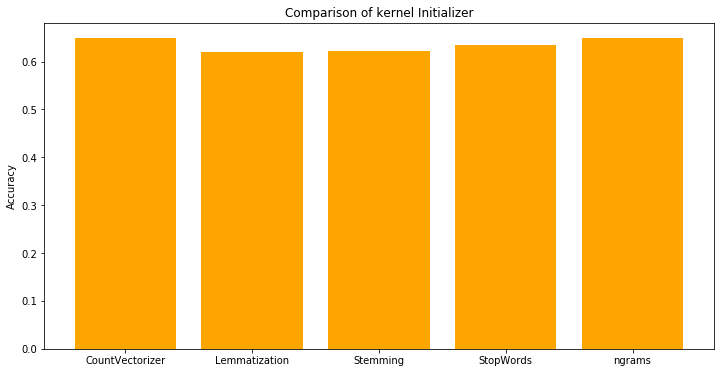

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["CountVectorizer","StopWords","ngrams","Stemming", "Lemmatization"],[0.649,0.6343,0.649,0.6212, 0.6209],color="orange",align='center')
plt.title("Comparison of kernel Initializer")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

the best model was the ngrams one, so we will use it to train the Neural Network

# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import rmsprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [0]:
model = Sequential()
model.add(Dense(128, input_shape=(22011,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5,seed=123))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               2817536   
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 2,818,435
Trainable params: 2,818,179
Non-trainable params: 256
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop(lr=0.0001), metrics=["accuracy"])

In [0]:
X_dtm = vect.fit_transform(X_train)

In [0]:
X_dtm.shape, y_train.shape

((9808, 22011), (9808, 3))

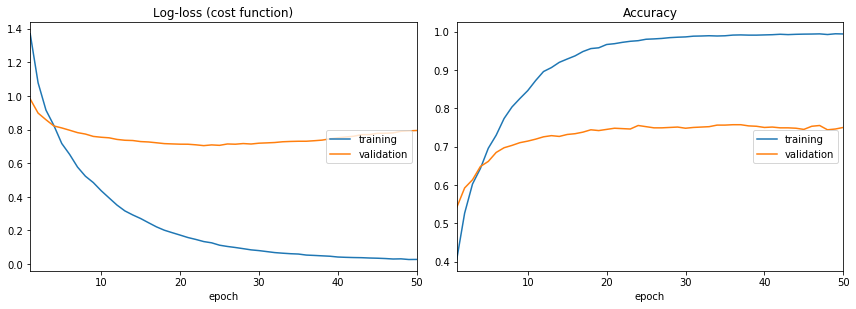

In [0]:
np.random.seed(123)
batch_size = 1000
model.fit(X_dtm, y_train, epochs = 50, verbose = 2, batch_size=batch_size, validation_split=0.1,callbacks=[PlotLossesKeras()])


In [0]:
X_test_1 = vect.transform(X_test)

In [0]:
model_pred_1 = model.predict_classes(X_test_1)

In [0]:
y_test_1 = y_test.argmax(axis=1)

In [0]:
print('the prediction model is=',(model_pred_1==y_test_1).mean())

the prediction model is= 0.792632450331


All the previous models got an accuracy between 0.62 and 0.65 and using a simple Neural Network the accuracy of the model increase between 0.78 and 0.8.

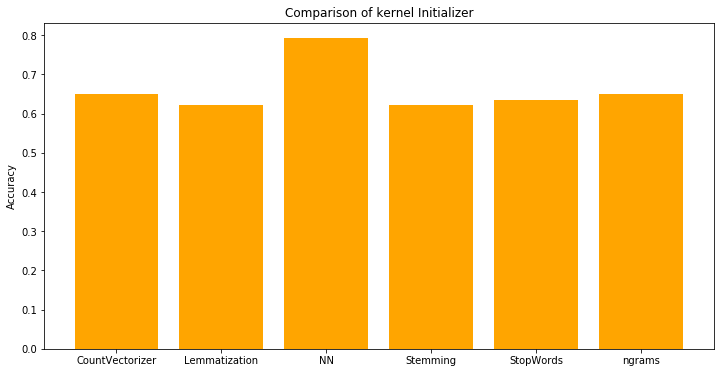

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["CountVectorizer","StopWords","ngrams","Stemming", "Lemmatization","NN"],[0.649,0.6343,0.649,0.6212, 0.6209, 0.7926],color="orange",align='center')
plt.title("Comparison of kernel Initializer")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

The best model is NN with  better performance than the others with accuracy 0.79.